# Kullanım Amacı

Bu veri seti, futbolcuların çeşitli özelliklerine dayanarak value_eur (piyasa değeri) değerini tahmin etmek amacıyla kullanılacaktır. Özellikle, futbolcuların yaşları, boy ve kilo gibi fiziksel özellikleri, beceri seviyeleri, ve maaşları gibi bilgileri kullanarak, oyuncuların piyasa değerinin tahmin edilmesi hedeflenmektedir. Bu tür bir model, futbol takımları için oyuncu değerlendirme ve transfer stratejilerinin oluşturulmasında yardımcı olabilir.

# Veri Seti Raporu: Futbolcu Performans Verisi

- **Veri Boyutu**: Veri seti, 19,237 futbolcuya ait bilgileri içermektedir.

- **Özellik Sayısı (Kolonlar)**: Veri setinde toplam 17 kolon bulunmaktadır. Bu kolonlar futbolcuların demografik bilgilerini, performans bilgilerini ve finansal durumlarını içermekte.


edir.



In [1]:
import numpy as np
import pandas as pd 

In [2]:
# Excel dosyasını yükleme
df = pd.read_excel('fifa22.xlsx')
df.head()

,short_name,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_joined,nationality_name,weak_foot,skill_moves,work_rate,release_clause_eur
0,M. GarcÃ­a,Marco Antonio GarcÃ­a Robledo,60,72,600000.0,2000.0,21,155,66,Club Universidad Nacional,Mexican Liga MX,2021-07-22,Mexico,3,2,High/Medium,1100000.0
1,N. Barrios,Cristian Nahuel Barrios,68,74,1900000.0,5000.0,23,156,58,San Lorenzo de Almagro,Argentina Primera DivisiÃ³n,2017-01-01,Argentina,3,4,High/Low,3200000.0
2,L. Paiva,Leandro GastÃ³n Paiva SanturiÃ³n,66,66,900000.0,500.0,27,156,57,Club AtlÃ©tico Rentistas,Uruguayan Primera DivisiÃ³n,2021-04-22,Uruguay,3,3,High/Medium,1900000.0
3,Y. Soteldo,Yeferson Julio Soteldo MartÃ­nez,77,83,16500000.0,9000.0,24,158,55,Toronto FC,USA Major League Soccer,2021-05-01,Venezuela,5,4,High/Medium,28100000.0
4,M. Moralez,Maximiliano Nicol Moralez,75,75,2600000.0,9000.0,34,158,56,New York City FC,USA Major League Soccer,2017-02-15,Argentina,4,4,High/High,3900000.0


In [3]:
print(df.isnull().sum()) # eksik hücreleri görmek için

short_name               0
long_name                0
overall                  0
potential                0
value_eur               71
wage_eur                58
age                      0
height_cm                0
weight_kg                0
club_name               58
league_name             58
club_joined           1160
nationality_name         0
weak_foot                0
skill_moves              0
work_rate                0
release_clause_eur    1173
dtype: int64


In [4]:
#eksik verileri doldurmak için
# release_clause_eur sütunundaki boş olmayan değerlerin ortalamasını hesapla
mean_value_release_clause_eur = df["release_clause_eur"].mean(skipna=True)
mean_value_value_eur = df["value_eur"].mean(skipna=True)
mean_value_wage_eur = df["wage_eur"].mean(skipna=True)

# release_clause_eur sütunundaki boş değerlere ortalama değeri ata
df["release_clause_eur"] = df["release_clause_eur"].fillna(mean_value_release_clause_eur)
df["value_eur"] = df["value_eur"].fillna(mean_value_value_eur)
df["wage_eur"] = df["wage_eur"].fillna(mean_value_wage_eur)

# Güncellenmiş verileri Excel dosyasına kaydetme (isterseniz yeni bir dosya olarak kaydedebilirsiniz)
df.to_excel("update_data.xlsx", index=False)

print("sütunundaki boş hücreler dolduruldu.")
df.head()

sütunundaki boş hücreler dolduruldu.


,short_name,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_joined,nationality_name,weak_foot,skill_moves,work_rate,release_clause_eur
0,M. GarcÃ­a,Marco Antonio GarcÃ­a Robledo,60,72,600000.0,2000.0,21,155,66,Club Universidad Nacional,Mexican Liga MX,2021-07-22,Mexico,3,2,High/Medium,1100000.0
1,N. Barrios,Cristian Nahuel Barrios,68,74,1900000.0,5000.0,23,156,58,San Lorenzo de Almagro,Argentina Primera DivisiÃ³n,2017-01-01,Argentina,3,4,High/Low,3200000.0
2,L. Paiva,Leandro GastÃ³n Paiva SanturiÃ³n,66,66,900000.0,500.0,27,156,57,Club AtlÃ©tico Rentistas,Uruguayan Primera DivisiÃ³n,2021-04-22,Uruguay,3,3,High/Medium,1900000.0
3,Y. Soteldo,Yeferson Julio Soteldo MartÃ­nez,77,83,16500000.0,9000.0,24,158,55,Toronto FC,USA Major League Soccer,2021-05-01,Venezuela,5,4,High/Medium,28100000.0
4,M. Moralez,Maximiliano Nicol Moralez,75,75,2600000.0,9000.0,34,158,56,New York City FC,USA Major League Soccer,2017-02-15,Argentina,4,4,High/High,3900000.0


**Eksik Değerlerin Doldurulması:**
release_clause_eur, value_eur, ve wage_eur sütunlarındaki eksik değerler, sütun ortalamaları ile dolduruldu.

In [5]:
print(df.isnull().sum())

short_name               0
long_name                0
overall                  0
potential                0
value_eur                0
wage_eur                 0
age                      0
height_cm                0
weight_kg                0
club_name               58
league_name             58
club_joined           1160
nationality_name         0
weak_foot                0
skill_moves              0
work_rate                0
release_clause_eur       0
dtype: int64


**Özellik Oluşturma:** Kilo ve boy verisinden vücut kitle indeksi sütunu oluşturuldu.

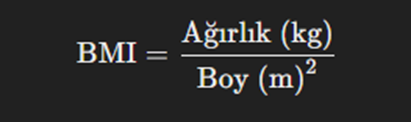

In [6]:
import pandas as pd

# BMI hesapla
df['body_mass_index'] = df['weight_kg'] / ((df['height_cm']/100) ** 2)

# Sonuçları görüntüle
print(df[['height_cm', 'weight_kg', 'body_mass_index']])

# İsterseniz sonucu yeni bir Excel dosyasına kaydedebilirsiniz
df.to_excel('update_data.xlsx', index=False)
df.head()

       height_cm  weight_kg  body_mass_index
0            155         66        27.471384
1            156         58        23.833005
2            156         57        23.422091
3            158         55        22.031726
4            158         56        22.432303
...          ...        ...              ...
19231        203         71        17.229246
19232        203         84        20.383897
19233        203         94        22.810551
19234        203         92        22.325220
19235        206        102        24.036196

[19236 rows x 3 columns]


,short_name,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_joined,nationality_name,weak_foot,skill_moves,work_rate,release_clause_eur,body_mass_index
0,M. GarcÃ­a,Marco Antonio GarcÃ­a Robledo,60,72,600000.0,2000.0,21,155,66,Club Universidad Nacional,Mexican Liga MX,2021-07-22,Mexico,3,2,High/Medium,1100000.0,27.471384
1,N. Barrios,Cristian Nahuel Barrios,68,74,1900000.0,5000.0,23,156,58,San Lorenzo de Almagro,Argentina Primera DivisiÃ³n,2017-01-01,Argentina,3,4,High/Low,3200000.0,23.833005
2,L. Paiva,Leandro GastÃ³n Paiva SanturiÃ³n,66,66,900000.0,500.0,27,156,57,Club AtlÃ©tico Rentistas,Uruguayan Primera DivisiÃ³n,2021-04-22,Uruguay,3,3,High/Medium,1900000.0,23.422091
3,Y. Soteldo,Yeferson Julio Soteldo MartÃ­nez,77,83,16500000.0,9000.0,24,158,55,Toronto FC,USA Major League Soccer,2021-05-01,Venezuela,5,4,High/Medium,28100000.0,22.031726
4,M. Moralez,Maximiliano Nicol Moralez,75,75,2600000.0,9000.0,34,158,56,New York City FC,USA Major League Soccer,2017-02-15,Argentina,4,4,High/High,3900000.0,22.432303


**Normalizasyon**: Veri tutarsızlıklarını önlemek için normalizasyon yapıldı

In [7]:
# Overall sütunu için normalizasyon yapmak için
# Overall sütununun en küçük ve en büyük değerleri
min_overall = df['overall'].min()
max_overall = df['overall'].max()

# potential sütunu için normalizasyon yapmak için
# potential sütununun en küçük ve en büyük değerleri
min_potential = df['potential'].min()
max_potential = df['potential'].max()

# Overall sütunu için normalizasyon yapmak için
# Overall sütununun en küçük ve en büyük değerleri
min_wage_eur = df['wage_eur'].min()
max_wage_eur = df['wage_eur'].max()

# age sütunu için normalizasyon yapmak için
# Yaş sütununun en küçük ve en büyük değerleri
min_age = df['age'].min()
max_age = df['age'].max()

# weak_foot sütunu için normalizasyon yapmak için
# weak_foot sütununun en küçük ve en büyük değerleri
min_weak_foot = df['weak_foot'].min()
max_weak_foot = df['weak_foot'].max()

# skill_moves sütunu için normalizasyon yapmak için
# skill_moves sütununun en küçük ve en büyük değerleri
min_skill_moves = df['skill_moves'].min()
max_skill_moves = df['skill_moves'].max()

# body_mass_index sütunu için normalizasyon yapmak için
# body_mass_index sütununun en küçük ve en büyük değerleri
min_body_mass_index = df['body_mass_index'].min()
max_body_mass_index = df['body_mass_index'].max()

# release_clause_eur sütunu için normalizasyon yapmak için
# release_clause_eur sütununun en küçük ve en büyük değerleri
min_release_clause_eur = df['release_clause_eur'].min()
max_release_clause_eur = df['release_clause_eur'].max()

# release_clause_eur sütunu için normalizasyon yapmak için
# release_clause_eur sütununun en küçük ve en büyük değerleri
min_value_eur = df['value_eur'].min()
max_value_eur = df['value_eur'].max()

# sütununun normalizasyonunu yap
df['overall_normalized'] = (df['overall'] - min_overall) / (max_overall - min_overall)
df['potential_normalized'] = (df['potential'] - min_potential) / (max_potential - min_potential)
df['wage_eur_normalized'] = (df['wage_eur'] - min_wage_eur) / (max_wage_eur - min_wage_eur)
df['age_normalized'] = (df['age'] - min_age) / (max_age - min_age)
df['weak_foot_normalized'] = (df['weak_foot'] - min_weak_foot) / (max_weak_foot - min_weak_foot)
df['skill_moves_normalized'] = (df['skill_moves'] - min_skill_moves) / (max_skill_moves - min_skill_moves)
df['body_mass_index_normalized'] = (df['body_mass_index'] - min_body_mass_index) / (max_body_mass_index - min_body_mass_index)
df['release_clause_eur_normalized'] = (df['release_clause_eur'] - min_release_clause_eur) / (max_release_clause_eur - min_release_clause_eur)
df['value_eur_normalized'] = (df['value_eur'] - min_value_eur) / (max_value_eur - min_value_eur)

# Normalized dataframe'i yazdır
print(df[['overall', 'overall_normalized']])
print(df[['potential', 'potential_normalized']])
print(df[['wage_eur', 'wage_eur_normalized']])
print(df[['age', 'age_normalized']])
print(df[['weak_foot_normalized', 'weak_foot']])
print(df[['skill_moves_normalized', 'skill_moves']])
print(df[['body_mass_index_normalized', 'body_mass_index']])
print(df[['release_clause_eur_normalized', 'release_clause_eur']])
print(df[['value_eur_normalized', 'value_eur']])


# Normalized verileri yeni bir Excel dosyasına kaydetmek
df.to_excel('update_normalized_data.xlsx', index=False)
df.head()

       overall  overall_normalized
0           60            0.282609
1           68            0.456522
2           66            0.413043
3           77            0.652174
4           75            0.608696
...        ...                 ...
19231       66            0.413043
19232       64            0.369565
19233       63            0.347826
19234       60            0.282609
19235       65            0.391304

[19236 rows x 2 columns]
       potential  potential_normalized
0             72              0.500000
1             74              0.543478
2             66              0.369565
3             83              0.739130
4             75              0.565217
...          ...                   ...
19231         72              0.500000
19232         66              0.369565
19233         67              0.391304
19234         60              0.239130
19235         66              0.369565

[19236 rows x 2 columns]
       wage_eur  wage_eur_normalized
0        2000.0        

,short_name,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,body_mass_index,overall_normalized,potential_normalized,wage_eur_normalized,age_normalized,weak_foot_normalized,skill_moves_normalized,body_mass_index_normalized,release_clause_eur_normalized,value_eur_normalized
0,M. GarcÃ­a,Marco Antonio GarcÃ­a Robledo,60,72,600000.0,2000.0,21,155,66,Club Universidad Nacional,...,27.471384,0.282609,0.500000,0.004292,0.131579,0.50,0.25,0.620591,0.002902,0.003047
1,N. Barrios,Cristian Nahuel Barrios,68,74,1900000.0,5000.0,23,156,58,San Lorenzo de Almagro,...,23.833005,0.456522,0.543478,0.012876,0.184211,0.50,0.75,0.430094,0.008525,0.009748
2,L. Paiva,Leandro GastÃ³n Paiva SanturiÃ³n,66,66,900000.0,500.0,27,156,57,Club AtlÃ©tico Rentistas,...,23.422091,0.413043,0.369565,0.000000,0.289474,0.50,0.50,0.408579,0.005044,0.004593
3,Y. Soteldo,Yeferson Julio Soteldo MartÃ­nez,77,83,16500000.0,9000.0,24,158,55,Toronto FC,...,22.031726,0.652174,0.739130,0.024320,0.210526,1.00,0.75,0.335783,0.075195,0.085009
4,M. Moralez,Maximiliano Nicol Moralez,75,75,2600000.0,9000.0,34,158,56,New York City FC,...,22.432303,0.608696,0.565217,0.024320,0.473684,0.75,0.75,0.356756,0.010399,0.013356


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19236 entries, 0 to 19235
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   short_name                     19236 non-null  object        
 1   long_name                      19236 non-null  object        
 2   overall                        19236 non-null  int64         
 3   potential                      19236 non-null  int64         
 4   value_eur                      19236 non-null  float64       
 5   wage_eur                       19236 non-null  float64       
 6   age                            19236 non-null  int64         
 7   height_cm                      19236 non-null  int64         
 8   weight_kg                      19236 non-null  int64         
 9   club_name                      19178 non-null  object        
 10  league_name                    19178 non-null  object        
 11  club_joined    

# Veri Analizi

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'release_clause_eur', 'body_mass_index', 'overall_normalized', 'potential_normalized', 'wage_eur_normalized', 'age_normalized', 'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized', 'release_clause_eur_normalized', 'value_eur_normalized']
Categorical Columns: ['short_name', 'long_name', 'club_name', 'league_name', 'club_joined', 'nationality_name', 'work_rate']




Bu işlemde, seçilen sütunlar arasındaki ilişkiler analiz edilmiş ve hedef değişken (value_eur_normalized) ile olan korelasyonlar sıralanmıştır. Korelasyonlar bir matris olarak görselleştirilmiştir.

Seçilen sütunlar arasındaki korelasyonlar bir ısı haritası (heatmap) olarak görselleştirildi. 

Hedef değişken 'value_eur' ile korelasyonlar:
 value_eur_normalized             1.000000
release_clause_eur_normalized    0.981640
wage_eur_normalized              0.823494
overall_normalized               0.553836
potential_normalized             0.526925
skill_moves_normalized           0.256716
weak_foot_normalized             0.149498
age_normalized                   0.042626
body_mass_index_normalized       0.040262
Name: value_eur_normalized, dtype: float64


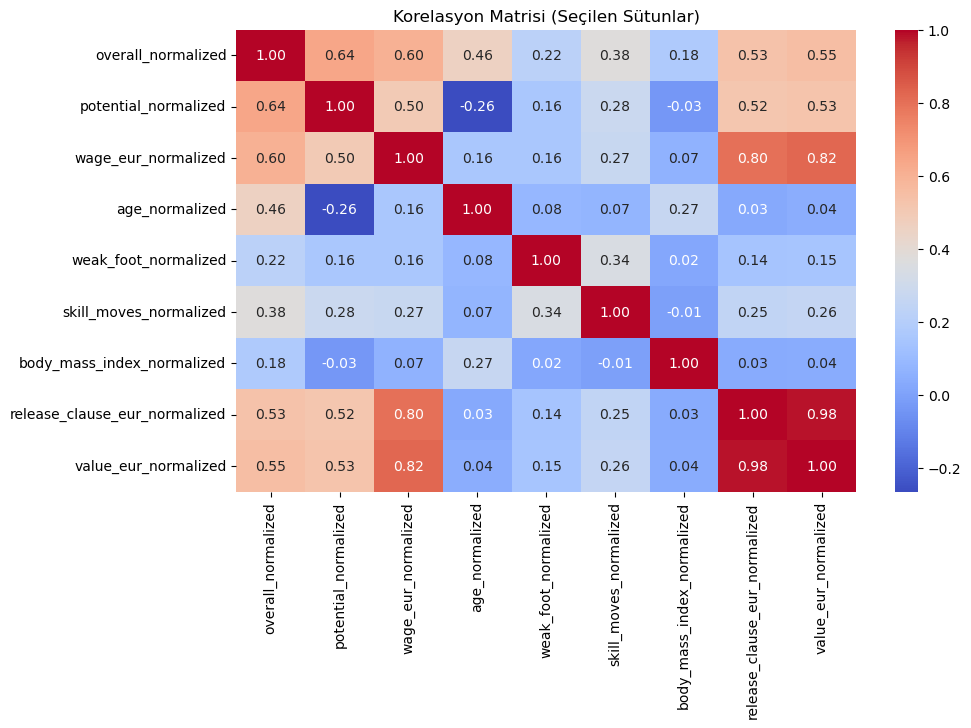

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# İncelenecek sütunları ve hedef değişkeni seçme
columns_of_interest = [
    'overall_normalized', 'potential_normalized', 'wage_eur_normalized', 'age_normalized',
    'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized', 'release_clause_eur_normalized'
]
target_column = 'value_eur_normalized'

# İlgili sütunları ve hedef değişkeni içeren yeni bir DataFrame oluşturma
df_subset = df[columns_of_interest + [target_column]]

# Korelasyon matrisi oluşturma
correlation_matrix = df_subset.corr()

# Hedef değişkenle ilgili korelasyonları sıralama
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)
print("Hedef değişken 'value_eur' ile korelasyonlar:\n", correlation_with_target)

# Korelasyon matrisini görselleştirme (sadece seçili sütunlar için)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi (Seçilen Sütunlar)")
plt.show()


wage_eur ile release_clause_eur korelasyon değerleri 0.70 den fazla çıktığı için bu verileri çıkartıyoruz.

Oyuncu değerlerinin (value_eur) dağılımını incelemek için bir histogram oluşturulmuş ve temel istatistiksel özet çıkarılmıştır.

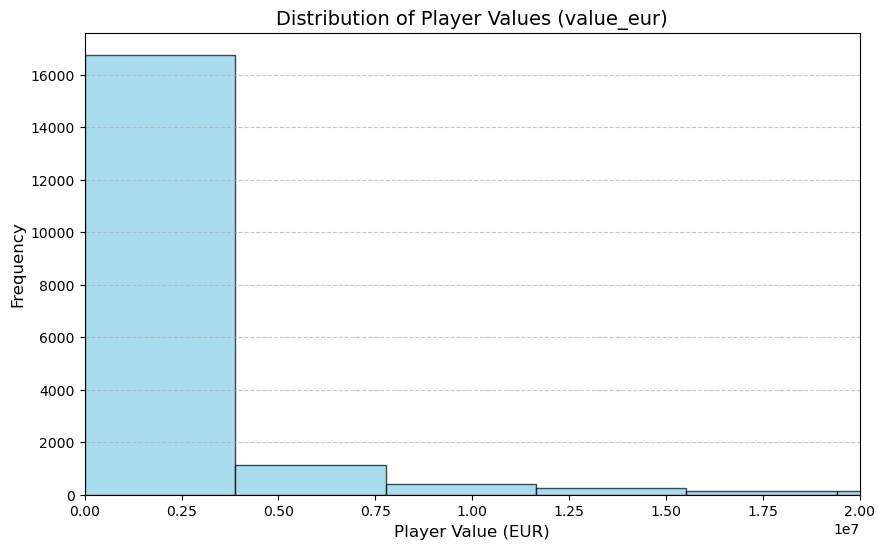

count    1.923600e+04
mean     2.850452e+06
std      7.599635e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.100000e+06
max      1.940000e+08
Name: value_eur, dtype: float64

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['value_eur'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Player Values (value_eur)', fontsize=14)
plt.xlabel('Player Value (EUR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 2e7)  # Görselliği artırmak için aralığı sınırla (outlier'ları hariç bırakabiliriz)
plt.show()

value_summary = df['value_eur'].describe()
value_summary

Bu işlemde, value_eur sütunu için temel istatistiksel değerler hesaplanmış ve ekrana yazdırılmıştır.

In [12]:
value_stats = {
    'Mean': df['value_eur'].mean(),
    'Median': df['value_eur'].median(),
    'Min': df['value_eur'].min(),
    'Max': df['value_eur'].max(),
    'Std Dev': df['value_eur'].std(),
}

print("Player Value Statistics:")
for key, value in value_stats.items():
    print(f"{key}: {value}")


Player Value Statistics:
Mean: 2850451.8132011485
Median: 975000.0
Min: 9000.0
Max: 194000000.0
Std Dev: 7599635.15780729


Bu işlemde, veri setindeki sayısal sütunların dağılımını incelemek için histogramlar oluşturulmuştur.

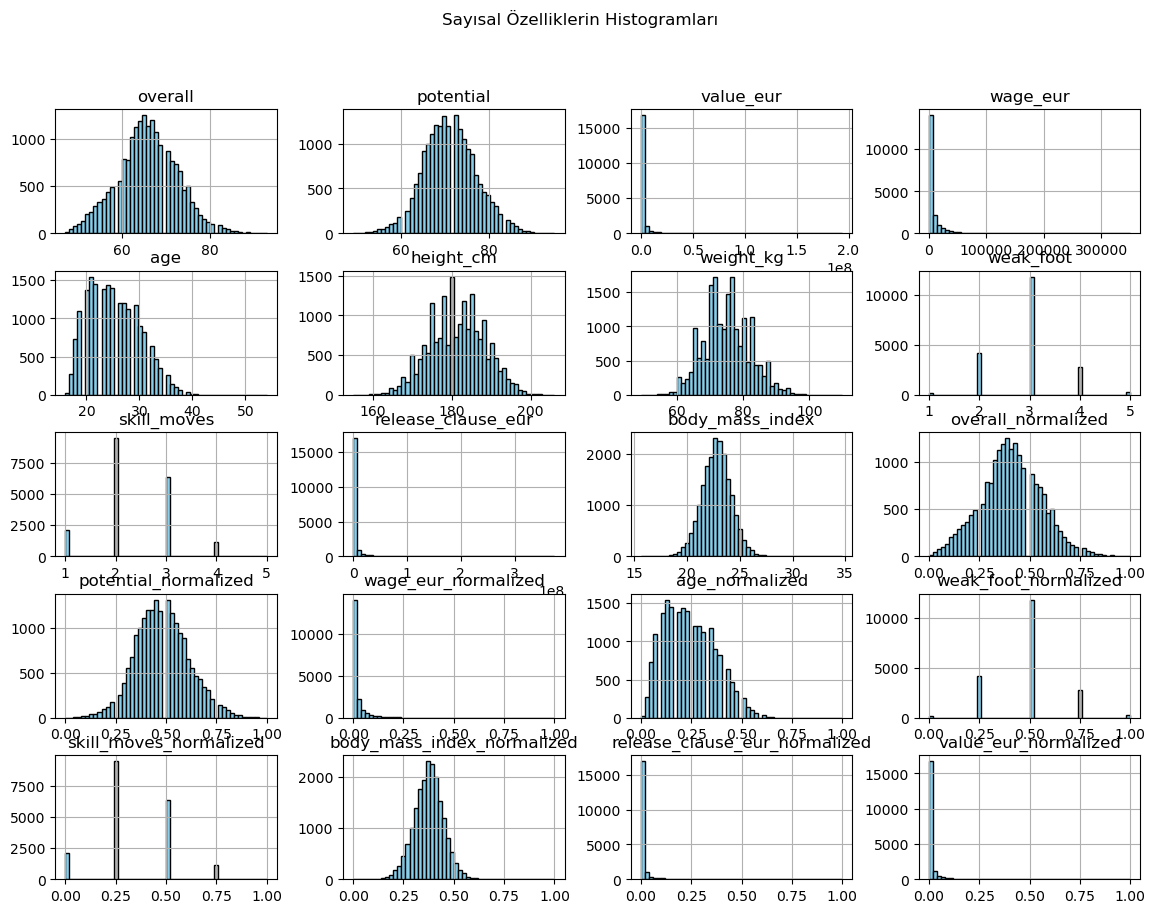

In [13]:
# Sayısal özelliklerin histogramları
df[numeric_columns].hist(bins=50, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Sayısal Özelliklerin Histogramları")
plt.show()


In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split  # Import train_test_split

# Ortalama değeri eşik olarak al
threshold = df['value_eur_normalized'].median()  # Ortanca değeri eşik olarak alalım

# Sınıf etiketlerini oluştur
df['value_category'] = (df['value_eur_normalized'] > threshold).astype(int)  # 0: düşük, 1: yüksek

# Özellikleri ve hedef değişkeni ayır
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['value_eur_normalized', 'value_category'], errors='ignore')
y = df['value_category']

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
;
# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Sınıf dağılımını kontrol et
print(f"Orijinal eğitim seti sınıf dağılımı: {Counter(y_train)}")
print(f"SMOTE eğitim seti sınıf dağılımı: {Counter(y_train_smote)}")

Orijinal eğitim seti sınıf dağılımı: Counter({0: 6830, 1: 6635})
SMOTE eğitim seti sınıf dağılımı: Counter({0: 6830, 1: 6830})


Bu işlemde, oyuncu değerlerini kategorilere ayırarak sınıf etiketleri oluşturulmuş, veri seti eğitim ve test olarak bölünmüş ve dengesiz sınıflar SMOTE yöntemiyle dengelenmiştir.

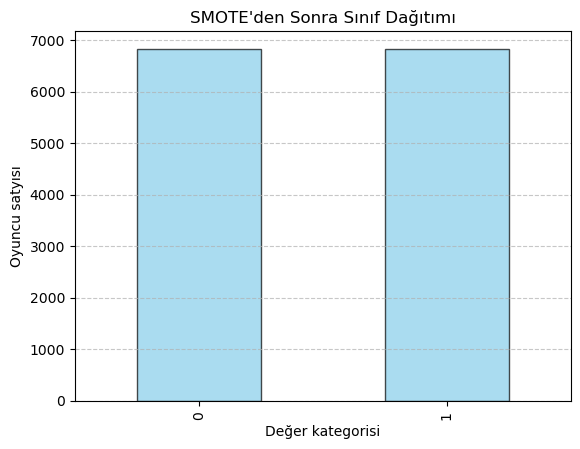

In [15]:
# SMOTE sonrası sınıf dağılımını görselleştir
y_train_smote.value_counts().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title("SMOTE'den Sonra Sınıf Dağıtımı")
plt.xlabel('Değer kategorisi')
plt.ylabel('Oyuncu satyısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu işlemde, seçilen özellikler (overall, age, wage_eur, body_mass_index, value_category) kullanılarak oyuncu değer kategorilerinin (0: düşük, 1: yüksek) dağılımı görselleştirilmiş ve özellikler arasındaki korelasyon analiz edilmiştir.

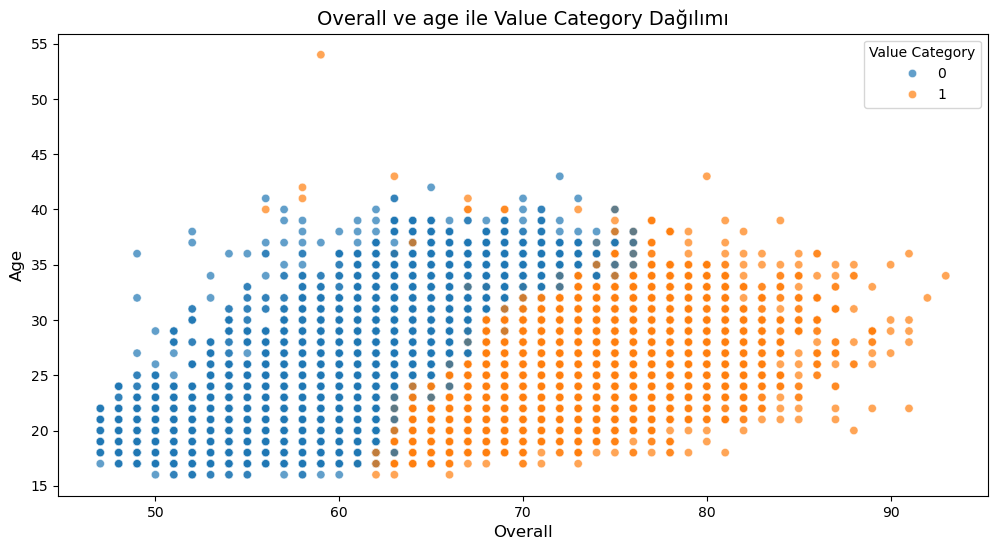

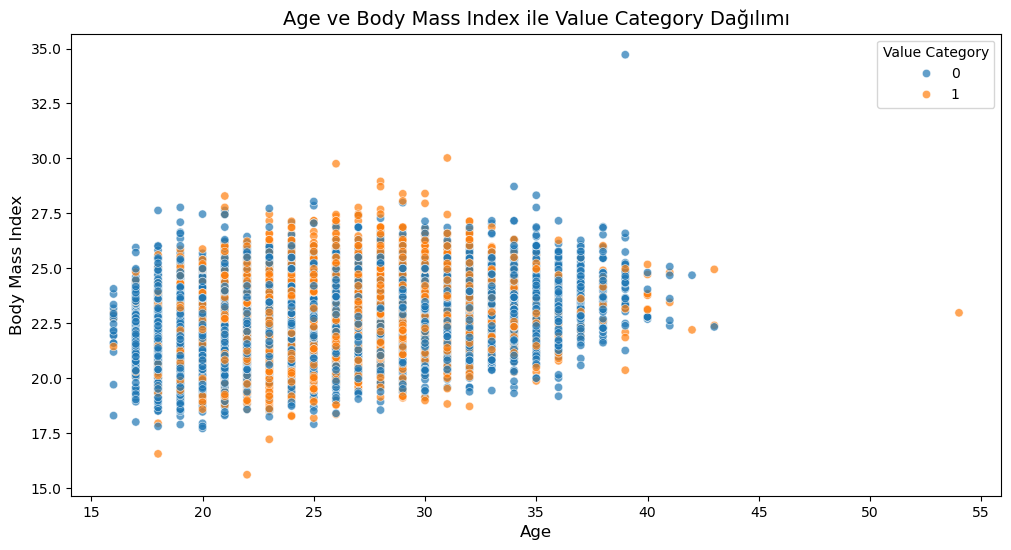

In [16]:
# Seçilen özellikleri ve hedef değişkeni içeren bir alt veri seti oluşturma
selected_features = ['overall','potential','age', 'body_mass_index', 'value_category','weak_foot','skill_moves']
analysis_data = df[selected_features].copy()

# Body Mass Index'in sayısal olması gerekebilir (bazı noktalama işaretleri düzeltilebilir)
analysis_data['body_mass_index'] = analysis_data['body_mass_index'].replace(',', '.', regex=True).astype(float)

# Scatter Plot: overall ve wage_eur'ye göre value_category (0 veya 1) dağılımı
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analysis_data, x='overall', y='age', hue='value_category', alpha=0.7)
plt.title('Overall ve age ile Value Category Dağılımı', fontsize=14)
plt.xlabel('Overall', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Value Category')
plt.show()

# Scatter Plot: age ve body_mass_index'e göre value_category dağılımı
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analysis_data, x='age', y='body_mass_index', hue='value_category', alpha=0.7)
plt.title('Age ve Body Mass Index ile Value Category Dağılımı', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Body Mass Index', fontsize=12)
plt.legend(title='Value Category')
plt.show()


# Model Eğitme

**Decision Tree**

Bu işlemde, DecisionTreeRegressor modeli kullanılarak oyuncu değerlerini tahmin etmek için bir model eğitilmiş, hiperparametre optimizasyonu yapılmış ve model performansı değerlendirilmiştir.


1)Veri Hazırlığı:
Normalizasyon yapılmış özellikler (overall_normalized, potential_normalized, vb.) bağımsız değişken, value_eur_normalized ise bağımlı değişken olarak tanımlandı.

o	Veri, %80 eğitim ve %20 test seti olacak şekilde ayrıldı.

2)Model Eğitimi ve Optimizasyonu:
o	Karar ağacı modeli DecisionTreeRegressor kullanılarak oluşturuldu.

o	GridSearchCV ile hiperparametreler (max_depth, min_samples_split, min_samples_leaf) optimize edildi ve en iyi model bulundu.

3)Tahmin ve Performans Değerlendirme:
   
o	Test ve eğitim setleri üzerinde tahminler yapıldı.

o	Performans metrikleri hesaplandı:

	MSE (Ortalama Kare Hatası)

	MAE (Ortalama Mutlak Hata)

	RMSE (Kök Ortalama Kare Hatası)

	MAPE (Ortalama Yüzde Hatası)

	R² Skoru (Eğitim ve Test)

4)Görselleştirme:

o	Eğitim ve test seti için R² skorları bir bar grafiği ile görselleştirildi.

Sonuç:

En iyi hiperparametrelerle eğitilen modelin test seti R² skoru modelin veri üzerindeki tahmin gücünü göstermiştir. Performans metrikleri ve görselleştirme, modelin genelleştirme yeteneğini değerlendirmek için kullanılmıştır.


**Decision Tree**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
# Veriyi yükleme ve inceleme
df = pd.read_excel("update_normalized_data.xlsx")
df.head()

,short_name,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,body_mass_index,overall_normalized,potential_normalized,wage_eur_normalized,age_normalized,weak_foot_normalized,skill_moves_normalized,body_mass_index_normalized,release_clause_eur_normalized,value_eur_normalized
0,M. GarcÃ­a,Marco Antonio GarcÃ­a Robledo,60,72,600000.0,2000.0,21,155,66,Club Universidad Nacional,...,27.471384,0.282609,0.500000,0.004292,0.131579,0.50,0.25,0.620591,0.002902,0.003047
1,N. Barrios,Cristian Nahuel Barrios,68,74,1900000.0,5000.0,23,156,58,San Lorenzo de Almagro,...,23.833005,0.456522,0.543478,0.012876,0.184211,0.50,0.75,0.430094,0.008525,0.009748
2,L. Paiva,Leandro GastÃ³n Paiva SanturiÃ³n,66,66,900000.0,500.0,27,156,57,Club AtlÃ©tico Rentistas,...,23.422091,0.413043,0.369565,0.000000,0.289474,0.50,0.50,0.408579,0.005044,0.004593
3,Y. Soteldo,Yeferson Julio Soteldo MartÃ­nez,77,83,16500000.0,9000.0,24,158,55,Toronto FC,...,22.031726,0.652174,0.739130,0.024320,0.210526,1.00,0.75,0.335783,0.075195,0.085009
4,M. Moralez,Maximiliano Nicol Moralez,75,75,2600000.0,9000.0,34,158,56,New York City FC,...,22.432303,0.608696,0.565217,0.024320,0.473684,0.75,0.75,0.356756,0.010399,0.013356


In [19]:
# Özellikler ve hedef değişken tanımlama
features = [
    'overall_normalized', 'potential_normalized', 'age_normalized',
    'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized' ] 
# Model için kullanılacak bağımsız değişkenler

target = 'value_eur_normalized'  # Bağımlı değişken (hedef)

# Bağımsız ve bağımlı değişkenleri ayırma
X = df[features]  # Özellikler
y = df[target]  # Hedef değişken

# Eğitim ve test setlerine ayırma (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Veriyi ikiye bölme

In [20]:
# Modeli başlatma
model = DecisionTreeRegressor(random_state=42)  # Decision Tree Regressor modeli oluşturma

# Hiperparametre aralığı tanımlama
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # Maksimum derinlik değerleri
    'min_samples_split': [2, 5, 10],  # Bölünme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümünde minimum örnek sayısı
}

# GridSearchCV ile çapraz doğrulama
# Model için en iyi hiperparametreleri bulmak amacıyla GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # GridSearch işlemini eğitim seti üzerinde gerçekleştirme

# En iyi hiperparametreleri bulma
best_params = grid_search.best_params_  # En iyi hiperparametrelerin çıktısı
print("En iyi hiperparametreler:", best_params)

# En iyi modeli alma
best_model = grid_search.best_estimator_  # Optimize edilmiş model

En iyi hiperparametreler: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Test setinde tahmin yapma
y_pred_test = best_model.predict(X_test)  # Test verisi için tahmin
# Eğitim setinde tahmin yapma
y_pred_train = best_model.predict(X_train)  # Eğitim verisi için tahmin

# Performans metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred_test)  # Ortalama Kare Hatası (MSE)
mae = mean_absolute_error(y_test, y_pred_test)  # Ortalama Mutlak Hata (MAE)
rmse = np.sqrt(mse)  # Kök Ortalama Kare Hatası (RMSE)
mape = mean_absolute_percentage_error(y_test, y_pred_test)  # Ortalama Yüzde Hatası (MAPE)
r2_test = r2_score(y_test, y_pred_test)  # Test seti R^2 Skoru
r2_train = r2_score(y_train, y_pred_train)  # Eğitim seti R^2 Skoru

# Metrikleri yazdırma
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score (Test):", r2_test)
print("R2 Score (Train):", r2_train)


Mean Squared Error (MSE): 5.909898747097998e-05
Mean Absolute Error (MAE): 0.0010243341654072756
Root Mean Squared Error (RMSE): 0.007687586582990788
Mean Absolute Percentage Error (MAPE): 0.0776111635934672
R2 Score (Test): 0.9652431733141483
R2 Score (Train): 0.9960388243862649


En iyi hiperparametrelerle eğitilen modelin test seti R² skoru modelin veri üzerindeki tahmin gücünü göstermiştir. Performans metrikleri ve görselleştirme, modelin genelleştirme yeteneğini değerlendirmek için kullanılmıştır.

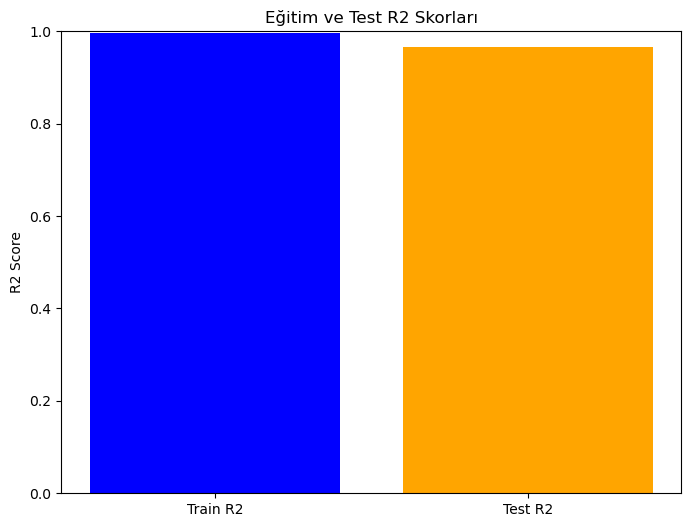

In [22]:
# R^2 Skorlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.bar(['Train R2', 'Test R2'], [r2_train, r2_test], color=['blue', 'orange'])
plt.title('Eğitim ve Test R2 Skorları')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

Avantajlar:

Kolayca yorumlanabilir ve anlaşılabilir bir modeldir.

Küçük veri setlerinde ve sınıflandırma ya da regresyon görevlerinde iyi performans gösterebilir.
    
Özellik seçiminde etkili; gereksiz özellikleri otomatik olarak eleyebilir.
    
Hesaplama maliyeti düşüktür ve hızlı çalışır.

Dezavantajlar:

Aşırı öğrenme (overfitting) riski yüksektir, bu da genelleme kabiliyetini sınırlayabilir.
    
Karar ağaçları dengesiz veri setlerinde dengesiz sonuçlar verebilir.
    
Diğer daha karmaşık modeller (ör. Random Forest veya XGBoost) kadar güçlü değildir.

**KNN**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Veri setini yükleme
# Excel dosyasını yükleyerek bir DataFrame oluşturma
df = pd.read_excel("update_normalized_data.xlsx")

# Özellikler ve hedef değişken
# Modelin tahmin yapmak için kullanacağı bağımsız değişkenler (features) ve bağımlı değişken (target)
features = [
    'overall_normalized', 'potential_normalized', 'age_normalized',
    'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized' ] 
target = 'value_eur_normalized'

X = df[features]  # Özellikleri ayrıştırma
y = df[target]  # Hedef değişkeni ayrıştırma

# Veriyi eğitim ve test setlerine ayırma (Hold-Out yöntemi)
# Veriyi %80 eğitim ve %20 test olacak şekilde bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştırma
# KNN modeli için özelliklerin aynı ölçek aralığında olması gerekir
scaler = StandardScaler()  # Standartlaştırma işlemini başlatma
X_train = scaler.fit_transform(X_train)  # Eğitim setini standartlaştırma
X_test = scaler.transform(X_test)  # Test setini standartlaştırma

In [25]:
# Modeli başlatma
knn = KNeighborsRegressor()  # KNN Regressor modelini oluşturma

# Hiperparametre aralığı
# GridSearchCV için denenmek üzere hiperparametre aralıklarını belirleme
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Komşu sayısı
    'weights': ['uniform', 'distance'],  # Ağırlıklandırma türü
    'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev']  # Mesafe ölçüm metrikleri
}

# GridSearchCV ile çapraz doğrulama
# Hiperparametre optimizasyonu için GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Modeli eğitim seti üzerinde optimize etme

# En iyi hiperparametreleri bulma
best_params = grid_search.best_params_  # En iyi hiperparametrelerin çıktısı
print("En iyi hiperparametreler:", best_params)

# En iyi modeli alma
best_knn = grid_search.best_estimator_  # Optimize edilmiş modeli alma

En iyi hiperparametreler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score, median_absolute_error

# Test setinde tahmin yapma
# En iyi model ile test seti üzerinde tahmin yapma
y_pred_test = best_knn.predict(X_test)
# Eğitim setinde tahmin yapma
y_pred_train = best_knn.predict(X_train)

# Performans metrikleri
# Modelin performansını değerlendirmek için çeşitli hata ve açıklama oranlarını hesaplama
mse = mean_squared_error(y_test, y_pred_test)  # Ortalama Kare Hatası (MSE)
mae = mean_absolute_error(y_test, y_pred_test)  # Ortalama Mutlak Hata (MAE)
mape = mean_absolute_percentage_error(y_test, y_pred_test)  # Ortalama Yüzde Hatası (MAPE)
r2_test = r2_score(y_test, y_pred_test)  # Test seti R^2 Skoru (Açıklama Oranı)
r2_train = r2_score(y_train, y_pred_train)  # Eğitim seti R^2 Skoru
median_absolute_err = median_absolute_error(y_test, y_pred_test)  # Medyan Mutlak Hata

# Sonuçları yazdırma
# Hesaplanan performans metriklerini yazdırma
print("Model Performans Metrikleri:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Median Absolute Error: {median_absolute_err}")
print(f"R2 Score (Test): {r2_test}")
print(f"R2 Score (Train): {r2_train}")

Model Performans Metrikleri:
Mean Squared Error (MSE): 0.00016591441904554465
Mean Absolute Error (MAE): 0.002201752923520353
Mean Absolute Percentage Error (MAPE): 0.12093442415003697
Median Absolute Error: 0.0003372536360704433
R2 Score (Test): 0.9024237308586476
R2 Score (Train): 0.9999979938523536


En iyi hiperparametrelerle eğitilen modelin test seti R² skoru modelin veri üzerindeki tahmin gücünü göstermiştir. Performans metrikleri ve görselleştirme, modelin genelleştirme yeteneğini değerlendirmek için kullanılmıştır.

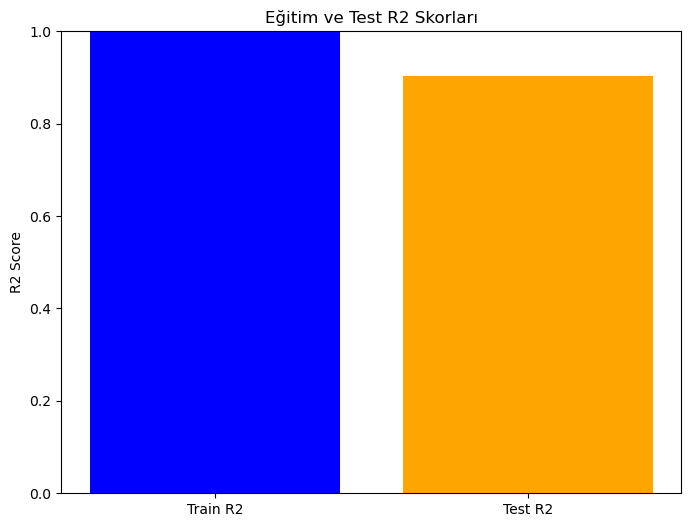

In [27]:
# R^2 Skorlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.bar(['Train R2', 'Test R2'], [r2_train, r2_test], color=['blue', 'orange'])
plt.title('Eğitim ve Test R2 Skorları')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()


Avantajlar:

Basit ve kolayca uygulanabilir bir algoritmadır.
    
Ön işleme gereksinimi azdır; ham veri üzerinde çalışabilir.
    
Küçük veri setlerinde ve düşük boyutlu verilerde etkili performans gösterebilir.

Dezavantajlar:

Büyük veri setlerinde hesaplama maliyeti yüksektir ve yavaştır.
    
Gürültüye karşı duyarlıdır; özellikle yüksek boyutlu veri setlerinde etkisiz hale gelebilir.
    
Model, her tahmin için tüm veri setini saklar, bu da yüksek bellek kullanımı gerektirir.
    
Optimum k değeri belirlemek zordur.

**xgboost**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
# Veri setini yükleme
# Excel dosyasından veri setini yükleyerek bir DataFrame oluşturma
df = pd.read_excel("update_normalized_data.xlsx")  # Veri setinizi burada yükleyin

# Özellikler ve hedef değişken tanımlama
# Modelin tahmin yapmak için kullanacağı bağımsız değişkenler (features) ve bağımlı değişken (target)
features = [
    'overall_normalized', 'potential_normalized', 'age_normalized',
    'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized' ] 
target = 'value_eur_normalized'

# Özellikler ve hedef değişkeni ayırma
X = df[features]  # Özellikler
y = df[target]  # Hedef değişken

# Verileri eğitim ve test olarak ayırma (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Eğitim ve test seti bölme

# Verileri standardize etme
# XGBoost, özellikle büyük farklar olan özelliklerle iyi çalışmaz. Bu yüzden standardizasyon uygulanır.
scaler = StandardScaler()  # StandardScaler nesnesi oluşturma
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim setini standardize etme
X_test_scaled = scaler.transform(X_test)  # Test setini standardize etme

In [30]:
# Modeli başlatma
# XGBoost modelini oluşturma
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hiperparametre aralığı
# GridSearchCV için denenmek üzere hiperparametre aralıklarını belirleme
param_grid = {
    'n_estimators': [100, 200],  # Ağaç sayısı
    'learning_rate': [0.01, 0.05],  # Öğrenme oranı
    'max_depth': [3, 5],  # Maksimum derinlik
    'min_child_weight': [1, 3],  # Minimum çocuk ağırlığı
    'subsample': [0.8, 0.9],  # Örnekleme oranı
    'colsample_bytree': [0.8, 0.9]  # Özelliklerin örnekleme oranı
}

# GridSearchCV ile çapraz doğrulama
# En iyi hiperparametreleri bulmak için GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)  # Eğitim seti üzerinde GridSearch işlemini gerçekleştirme

# En iyi hiperparametreleri bulma
best_params = grid_search.best_params_  # En iyi hiperparametrelerin çıktısı
print("En iyi hiperparametreler:", best_params)

# En iyi modeli alma
best_xgb_model = grid_search.best_estimator_  # Optimize edilmiş modeli alma

En iyi hiperparametreler: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9}


In [31]:
# Test seti üzerinde tahmin yapma
# Optimize edilmiş model ile test seti üzerinde tahmin yapma
y_pred_test = best_xgb_model.predict(X_test_scaled)
# Eğitim seti üzerinde tahmin yapma
y_pred_train = best_xgb_model.predict(X_train_scaled)

# Performans metriklerini hesaplama
# Test ve eğitim seti için hata ve doğruluk metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred_test)  # Ortalama Kare Hatası (MSE)
mae = mean_absolute_error(y_test, y_pred_test)  # Ortalama Mutlak Hata (MAE)
mape = mean_absolute_percentage_error(y_test, y_pred_test)  # Ortalama Yüzde Hatası (MAPE)
r2_test = r2_score(y_test, y_pred_test)  # Test seti için R^2 skoru
r2_train = r2_score(y_train, y_pred_train)  # Eğitim seti için R^2 skoru

# Performans metriklerini yazdırma
print("Model Performans Metrikleri:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R2 Score (Test): {r2_test}")
print(f"R2 Score (Train): {r2_train}")

Model Performans Metrikleri:
Mean Squared Error (MSE): 3.6389817974758145e-05
Mean Absolute Error (MAE): 0.0009412497909546844
Mean Absolute Percentage Error (MAPE): 0.11270935999232622
R2 Score (Test): 0.9785987095447376
R2 Score (Train): 0.9978244558601822


En iyi hiperparametrelerle eğitilen modelin test seti R² skoru modelin veri üzerindeki tahmin gücünü göstermiştir. Performans metrikleri ve görselleştirme, modelin genelleştirme yeteneğini değerlendirmek için kullanılmıştır.

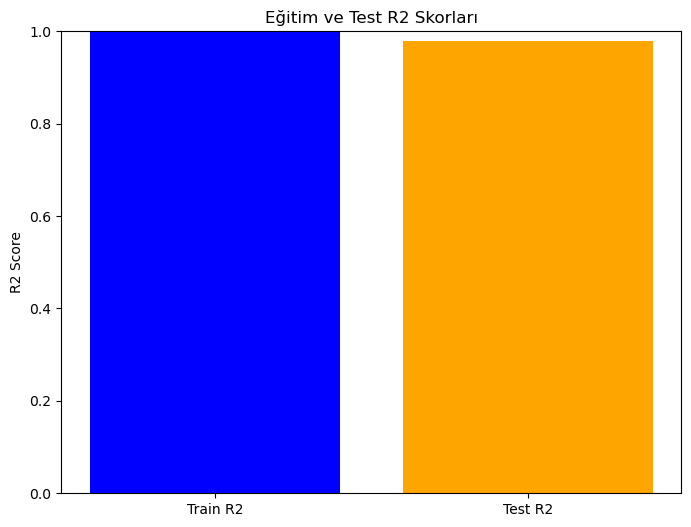

In [32]:
# Eğitim ve test R^2 skorlarını görselleştirme
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlama
plt.bar(['Train R2', 'Test R2'], [r2_train, r2_test], color=['blue', 'orange'])  # Eğitim ve test R^2 skorlarını çubuk grafik olarak gösterme
plt.title('Eğitim ve Test R2 Skorları')  # Grafik başlığı
plt.ylabel('R2 Score')  # Y ekseni etiketi
plt.ylim(0, 1)  # Y ekseni sınırları
plt.show()  # Grafiği gösterme


Avantajlar:

Karmaşık veri setlerinde ve özelliklerde oldukça yüksek doğruluk sağlar.

Esnek bir modeldir; parametrik ayarlamalar ile performansı artırılabilir.

Önyargı ve varyans arasında iyi bir denge sağlar.

Eksik değerlerle başa çıkma kabiliyeti vardır.

Hızlı ve ölçeklenebilir bir modeldir.

Dezavantajlar:

Parametre ayarları karmaşık ve zaman alıcı olabilir.

Küçük veri setlerinde aşırı karmaşık olabilir, bu da gereksiz hesaplama maliyetine yol açar.

Diğer algoritmalara göre daha fazla hesaplama gücü ve belleğe ihtiyaç duyar.

Modelin yorumlanması daha zordur.

**Random_Forest**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [35]:
# Veri setini yükleme
# Excel dosyasından veri setini yükleyerek bir DataFrame oluşturma
df = pd.read_excel("update_normalized_data.xlsx")  # Veri setinizi burada yükleyin

# Özellikler ve hedef değişken
# Modelin tahmin yapmak için kullanacağı bağımsız değişkenler (features) ve bağımlı değişken (target)
features = [
    'overall_normalized', 'potential_normalized', 'age_normalized',
    'weak_foot_normalized', 'skill_moves_normalized', 'body_mass_index_normalized' ] 

target = 'value_eur_normalized'

# Veri hazırlığı
X = df[features]  # Özellikleri ayrıştırma
y = df[target]  # Hedef değişkeni ayrıştırma

# Veriyi eğitim ve test olarak ayırma (Hold-Out yöntemi)
# Veriyi %80 eğitim ve %20 test olacak şekilde bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model ve hiperparametre optimizasyonu
rf = RandomForestRegressor(random_state=42)  # Random Forest modeli başlatma
param_grid = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_depth': [10, 20, 30, None],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Minimum bölünme örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Minimum yaprak örnek sayısı
}

# GridSearchCV ile çapraz doğrulama
# En iyi hiperparametreleri bulmak için GridSearchCV kullanımı
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Eğitim seti üzerinde GridSearch işlemini gerçekleştirme

# En iyi hiperparametreler
best_params = grid_search.best_params_  # En iyi hiperparametrelerin çıktısı
print("En iyi hiperparametreler:", best_params)

# Optimize edilmiş model
best_rf = grid_search.best_estimator_  # Optimize edilmiş Random Forest modeli

En iyi hiperparametreler: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
# Eğitim ve test setleri üzerinde tahmin yapma
y_pred_test = best_rf.predict(X_test)  # Test seti tahminleri
y_pred_train = best_rf.predict(X_train)  # Eğitim seti tahminleri

# Performans metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred_test)  # Ortalama Kare Hatası (MSE)
mae = mean_absolute_error(y_test, y_pred_test)  # Ortalama Mutlak Hata (MAE)
mape = mean_absolute_percentage_error(y_test, y_pred_test)  # Ortalama Yüzde Hatası (MAPE)
r2_test = r2_score(y_test, y_pred_test)  # Test seti için R^2 skoru
r2_train = r2_score(y_train, y_pred_train)  # Eğitim seti için R^2 skoru

# Performans metriklerini yazdırma
print("Model Performans Metrikleri:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R2 Score (Test): {r2_test}")
print(f"R2 Score (Train): {r2_train}")

Model Performans Metrikleri:
Mean Squared Error (MSE): 5.301307077478805e-05
Mean Absolute Error (MAE): 0.0009012813792146674
Mean Absolute Percentage Error (MAPE): 0.06491977426991423
R2 Score (Test): 0.9688223742596458
R2 Score (Train): 0.997424692095682


En iyi hiperparametrelerle eğitilen modelin test seti R² skoru modelin veri üzerindeki tahmin gücünü göstermiştir. Performans metrikleri ve görselleştirme, modelin genelleştirme yeteneğini değerlendirmek için kullanılmıştır.

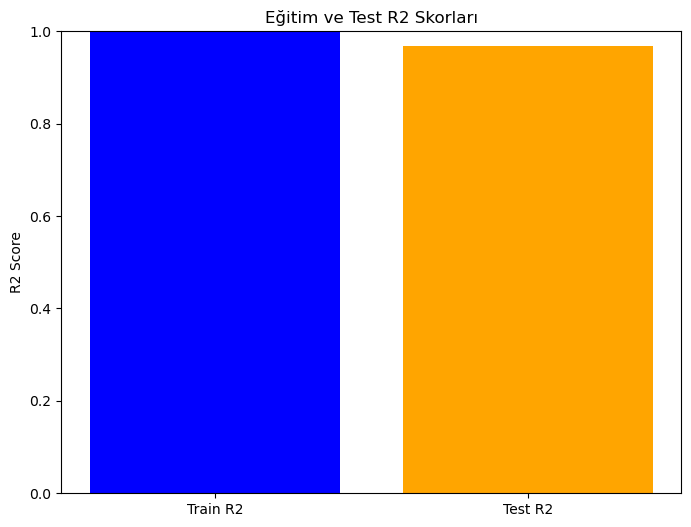

In [38]:
# Eğitim ve test R^2 skorlarını görselleştirme
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlama
plt.bar(['Train R2', 'Test R2'], [r2_train, r2_test], color=['blue', 'orange'])  # Eğitim ve test R^2 skorlarını çubuk grafik olarak gösterme
plt.title('Eğitim ve Test R2 Skorları')  # Grafik başlığı
plt.ylabel('R2 Score')  # Y ekseni etiketi
plt.ylim(0, 1)  # Y ekseni sınırları
plt.show()  # Grafiği gösterme

Avantajlar:

Aşırı öğrenme riskine karşı dayanıklıdır; genelde genelleme performansı yüksektir.
    
Dengesiz ve eksik verilerle etkili şekilde başa çıkabilir.
    
Özellik önem derecesini belirleyebilir, bu da analiz için yararlıdır.
    
Paralel işlemeye uygun yapısıyla büyük veri setlerinde hızlı çalışır.
    
Hem sınıflandırma hem de regresyon problemleri için uygundur.
    
Dezavantajlar:

Büyük ve yüksek boyutlu veri setlerinde modelin hesaplama maliyeti artabilir.
    
Tek ağaç modellerine kıyasla daha yavaş tahmin yapabilir.
    
Yüksek karmaşıklık, modelin yorumlanmasını zorlaştırır.

Çok fazla sayıda ağaç kullanıldığında aşırı kaynak tüketebilir.

# Sonuçları Karşılaştırma

Bu kod, farklı makine öğrenimi modellerinin performansını karşılaştırmak için tablo ve grafikler oluşturur. İşlemleri adım adım inceleyelim:

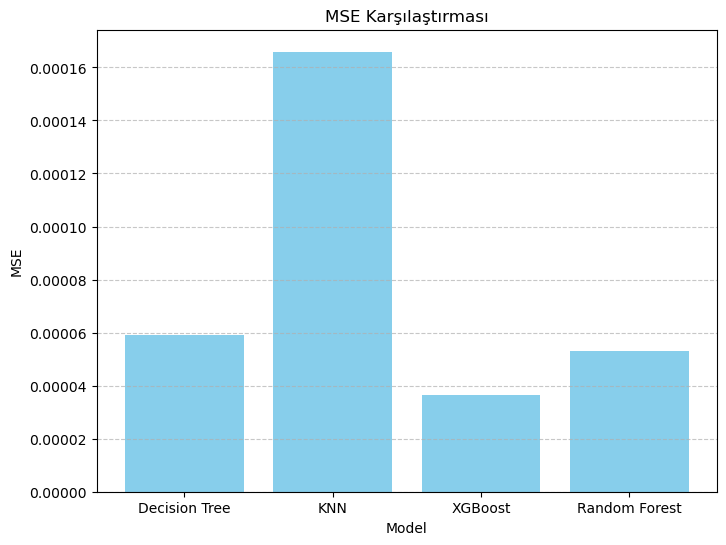

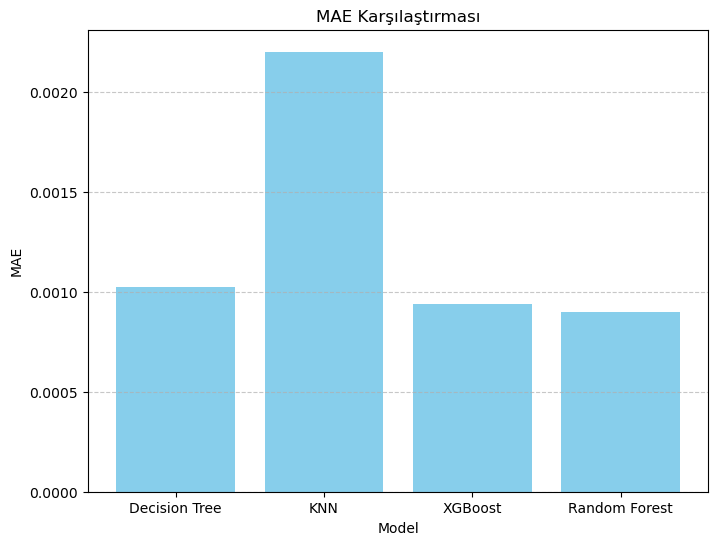

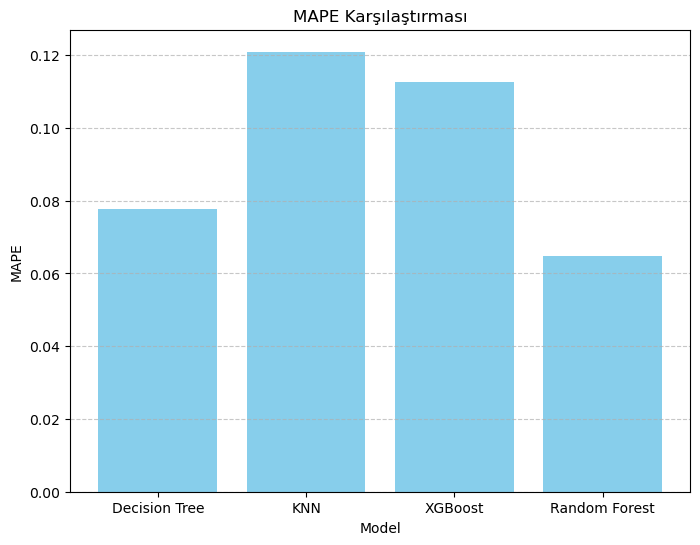

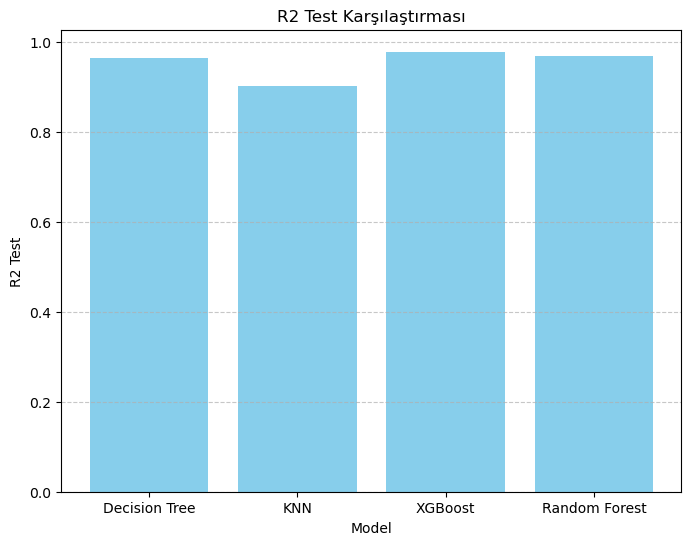

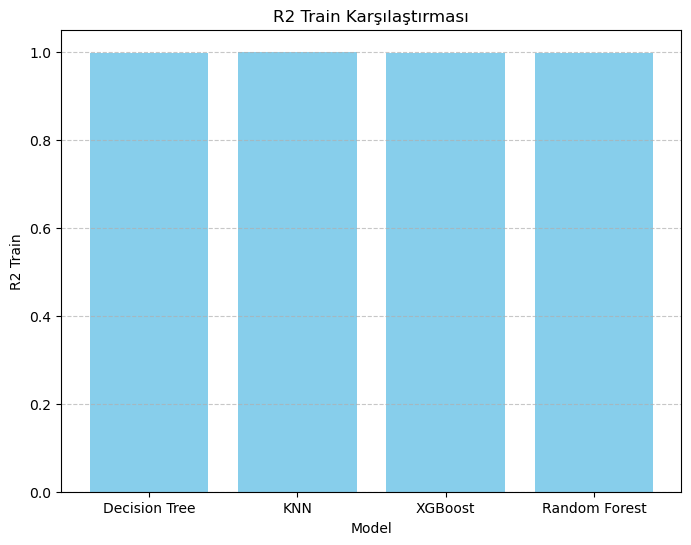

Model Karşılaştırma Sonuçları
           Model       MSE       MAE      MAPE  R2 Train   R2 Test
0  Decision Tree  0.000059  0.001024  0.077611  0.996039  0.965243
1            KNN  0.000166  0.002202  0.120934  0.999998  0.902424
2        XGBoost  0.000036  0.000941  0.112709  0.997824  0.978599
3  Random Forest  0.000053  0.000901  0.064920  0.997425  0.968822


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Model sonuçlarını tablo olarak oluşturma
model_results = {
    "Model": ["Decision Tree", "KNN", "XGBoost", "Random Forest"],
    "MSE": [5.909898747097998e-05, 0.00016591441904554465, 3.6389817974758145e-05, 5.301307077478805e-05],
    "MAE": [0.0010243341654072756, 0.002201752923520353, 0.0009412497909546844, 0.0009012813792146674],
    "MAPE": [0.0776111635934672, 0.12093442415003697, 0.11270935999232622, 0.06491977426991423],
    "R2 Train": [0.9960388243862649, 0.9999979938523536, 0.9978244558601822, 0.997424692095682],
    "R2 Test": [0.9652431733141483, 0.9024237308586476, 0.9785987095447376, 0.9688223742596458]
}

# DataFrame'e dönüştürme
results_df = pd.DataFrame(model_results)

# Performans metriklerini grafiklerle gösterme
metrics = ["MSE", "MAE", "MAPE", "R2 Test", "R2 Train"]

for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(results_df["Model"], results_df[metric], color="skyblue")
    plt.title(f"{metric} Karşılaştırması")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Tablonun yazdırılması
print("Model Karşılaştırma Sonuçları")
print(results_df)


1.Test MSE Karşılaştırması:

MSE-Ortalama Kare Hatası: Modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkların karelerinin ortalamasıdır.
   
XGBoost (0.000036): En düşük MSE değerine sahip, en iyi performansı gösteriyor.

Random Forest (0.000053): XGBoost’a yakın bir performans gösteriyor.

Decision Tree (0.000059): Kabul edilebilir bir hata oranı var, ancak XGBoost ve Random Forest’a göre daha yüksek.

KNN (0.000166): En yüksek MSE değerine sahip, dolayısıyla tahmin hataları diğer modellere göre daha fazla.


2.Test MAE Karşılaştırması:

MAE - Ortalama Mutlak Hata: Modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamasıdır.

Random Forest (0.000901): En düşük MAE değerine sahip, en iyi performansı gösteriyor.

XGBoost (0.000941): Random Forest’a çok yakın bir performans sunuyor.

Decision Tree (0.001024): Kabul edilebilir ancak diğer iki modele göre daha yüksek hata oranı sunuyor.

KNN (0.002202): En yüksek MAE değerine sahip, tahminlerinde daha fazla hata yapıyor.


3.Test MAPE (%) Karşılaştırması

MAPE - Ortalama Yüzde Hatası: Modelin tahmin ettiği değerlerin gerçek değerlere olan yüzde olarak ortalama hatasını ölçer.

Random Forest (6.49%): En düşük yüzde hata oranına sahip.

Decision Tree (7.76%): Kabul edilebilir ancak Random Forest’tan daha kötü.

XGBoost (11.27%): Daha yüksek bir hata oranı mevcut.

KNN (12.09%): En yüksek yüzde hata oranına sahip model.


4.Test R² Skoru Karşılaştırması

R-Kare Skoru: Modelin tahminlerinin, veri setindeki değişkenliği ne kadar iyi açıkladığını ölçer. 0 ile 1 arasında bir değere sahiptir.

XGBoost (0.9786): En yüksek R² skoruna sahip, en iyi performansı gösteriyor.

Random Forest (0.9688): XGBoost’a çok yakın bir performans sunuyor.

Decision Tree (0.9652): Güçlü bir performans, ancak diğer iki modelden biraz daha düşük.

KNN (0.9024): En düşük R² skoruna sahip, en zayıf modeli temsil ediyor.


Genel Değerlendirme

Yapılan karşılaştırmalara göre, XGBoost modeli genel olarak en iyi performansı sunmaktadır. En düşük MSE ve en yüksek R² Test skoruna sahip olması, tahmin doğruluğunu ve hata oranını minimize ettiğini göstermektedir.

Random Forest modeli, XGBoost’a çok yakın performans sergileyerek iyi bir alternatif olarak öne çıkmaktadır. MAE ve MAPE değerlerinin düşük olması, istikrarlı bir performans sunduğunu göstermektedir.

Decision Tree modeli, kabul edilebilir hata oranlarına sahip olmasına rağmen diğer modellere göre daha yüksek MSE ve daha düşük R² skorları nedeniyle biraz geride kalmaktadır

KNN modeli ise en yüksek MSE ve MAE değerleriyle en düşük performansı göstermiştir. Modelin doğruluğunu artırmak için parametre optimizasyonu ve daha uygun veri ön işleme teknikleri değerlendirilebilir.
